Importing   Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#import data set
store_data= pd.read_csv('Superstore.csv', encoding='windows-1252')

Assess the Data

In [5]:
store_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
store_data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [44]:
#number of null values in each column
store_data.isnull().sum()

row_id          0
order_date      0
ship_date       0
ship_mode       0
segment         0
country         0
city            0
state           0
region          0
category        0
sub-category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
sales_year      0
dtype: int64

In [10]:
#finding duplicates
store_data.duplicated().sum()

0

In [15]:
#Unique values in a coulumn
store_data.segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
pd.unique(store_data["region"])

array(['South', 'West', 'Central', 'East'], dtype=object)

In [45]:
pd.unique(store_data["sub-category"])


array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

    Data Cleaning

In [12]:
# Removing unncessary columns 
store_data.drop(columns=["Postal Code", "Order ID","Customer ID","Customer Name","Product ID"], inplace=True)

In [13]:
#Rename the column names to snake case without wite space
store_data.columns = store_data.columns.str.replace(' ','_').str.lower()

In [14]:
store_data.columns

Index(['row_id', 'order_date', 'ship_date', 'ship_mode', 'segment', 'country',
       'city', 'state', 'region', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [18]:
#Converting strings date
store_data['order_date']= pd.to_datetime(store_data['order_date'])
store_data['ship_date']= pd.to_datetime(store_data['ship_date'])


In [19]:
#Creating a column named sales_year
store_data['sales_year']=pd.DatetimeIndex(store_data['order_date'])

In [20]:
store_data

,row_id,order_date,ship_date,ship_mode,segment,country,city,state,region,category,sub-category,product_name,sales,quantity,discount,profit,sales_year
0,1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08
1,2,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08
2,3,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12
3,4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11
4,5,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014-01-21
9990,9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017-02-26
9991,9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017-02-26
9992,9993,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017-02-26


In [21]:
store_data.dtypes

row_id                   int64
order_date      datetime64[ns]
ship_date       datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
region                  object
category                object
sub-category            object
product_name            object
sales                  float64
quantity                 int64
discount               float64
profit                 float64
sales_year      datetime64[ns]
dtype: object

Analysis

In [25]:
#Total sales as per category
sales_category=store_data.groupby('category')['sales'].sum()
sales_category

category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: sales, dtype: float64

In [23]:
profit_category=store_data.groupby('category')['profit'].sum()
profit_category

category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: profit, dtype: float64

Text(0.5, 1.0, 'Total Profits by Catogery')

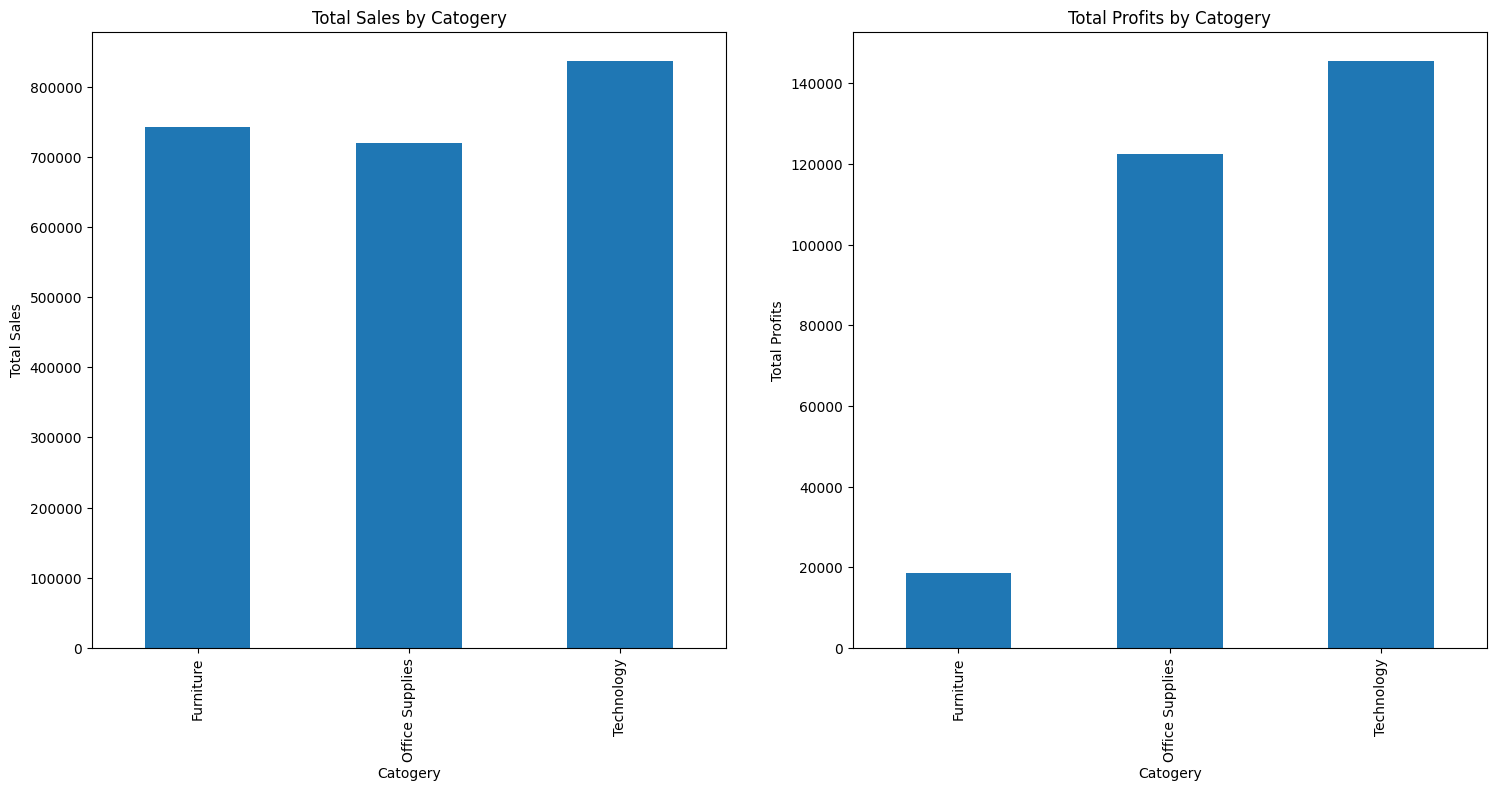

In [42]:
# Visualiztion of total sales as per categor
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sales_category.plot(kind='bar')
plt.xlabel("Catogery")
plt.ylabel("Total Sales")
plt.title("Total Sales by Catogery")

plt.subplot(1,2,2)
profit_category.plot(kind='bar')
plt.xlabel("Catogery")
plt.ylabel("Total Profits")
plt.title("Total Profits by Catogery")

From  above bar graph we can observe that profit by furniture is very low 

In [81]:
sales_subcategory =store_data.groupby(['sub-category'])['sales'].sum()
sales_subcategory

sub-category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: sales, dtype: float64

In [84]:
profit_subcategory=store_data.groupby( ['sub-category'])['profit'].sum()/sales_subcategory*100
profit_subcategory

sub-category
Accessories    25.054700
Appliances     16.867517
Art            24.071083
Binders        14.857361
Bookcases      -3.022768
Chairs          8.095673
Copiers        37.195585
Envelopes      42.267582
Fasteners      31.396504
Furnishings    14.240358
Labels         44.418672
Machines        1.788618
Paper          43.391837
Phones         13.489327
Storage         9.506113
Supplies       -2.547695
Tables         -8.564460
dtype: float64

Text(0, 0.5, 'Total Profit in percentage')

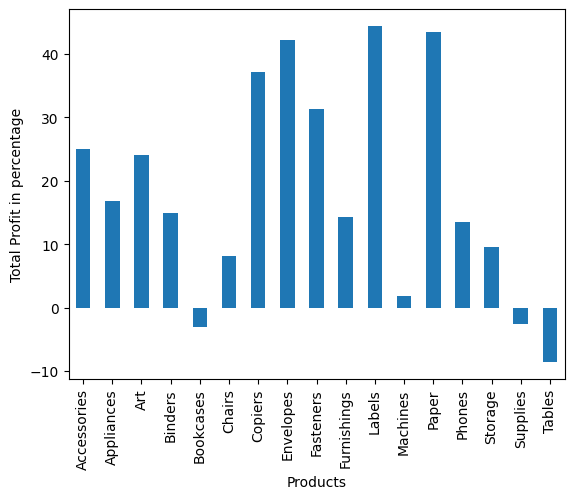

In [86]:
profit_subcategory.plot(kind='bar')
plt.xlabel("Products")
plt.ylabel("Total Profit in percentage")


From above graph we can observe that tables gives more losses and bookcases also non profitable products and lables,paper, envelopers  are most profitable products

In [97]:
#Total sales as per category
sales_city=store_data.groupby('city')['sales'].sum()
top_profit_city=store_data.groupby('city')['profit'].sum().nlargest(n=10)
least_profit_city=store_data.groupby('city')['profit'].sum().nsmallest(n=10)
sales_city
least_profit_city

city
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: profit, dtype: float64

Text(0.5, 1.0, 'Bottom 10 profit cities')

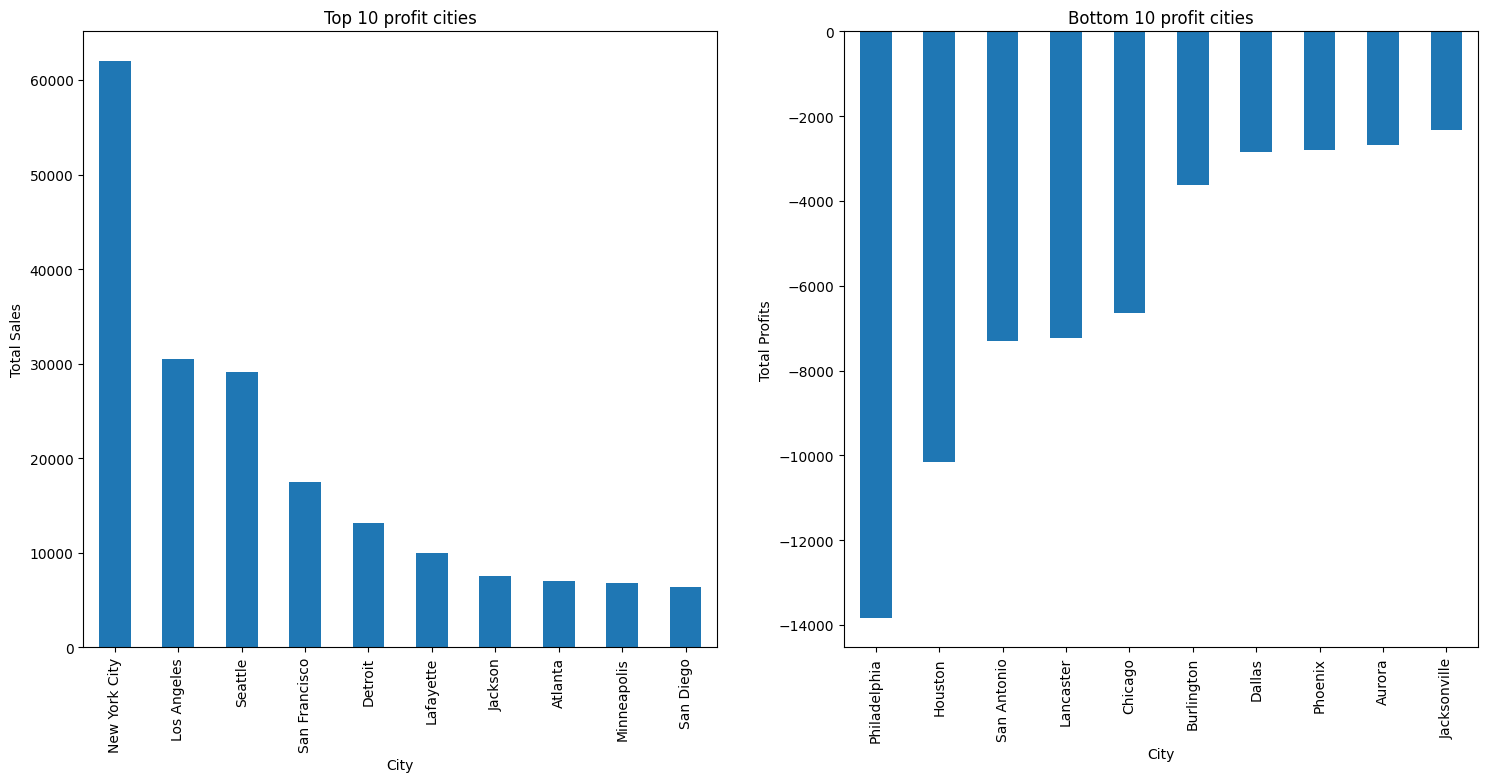

In [100]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
top_profit_city.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Top 10 profit cities")

plt.subplot(1,2,2)
least_profit_city.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Total Profits")
plt.title("Bottom 10 profit cities")